In [1]:
import pandas as pd 
import numpy as np
import torch
import matplotlib.pyplot as plt

trainX_df = pd.read_csv("train.csv", usecols=[0,1,2,3,4,5,6,7,8,9])
trainX_npArr = trainX_df.values
trainX = torch.tensor(trainX_npArr, dtype = torch.float64)
trainY_df = pd.read_csv("train.csv", usecols=[10])
trainY_df = trainY_df.iloc[:,-1]
print(trainY_df)
trainY_npArr = trainY_df.values
trainY = torch.tensor(trainY_npArr, dtype = torch.float64)
testX_df = pd.read_csv("test.csv", usecols=[0,1,2,3,4,5,6,7,8,9])
testX_npArr = testX_df.values 
testX = torch.tensor(testX_npArr, dtype = torch.float64)
testY_df = pd.read_csv("test.csv", usecols=[10])
testY_npArr = testY_df.values
testY = torch.tensor(testY_npArr, dtype = torch.float64)


0        3
1        2
2        9
3        7
4       12
        ..
1039     7
1040     6
1041     5
1042     2
1043     5
Name: DTH_CUM_CP, Length: 1044, dtype: int64


tensor(4., requires_grad=True)


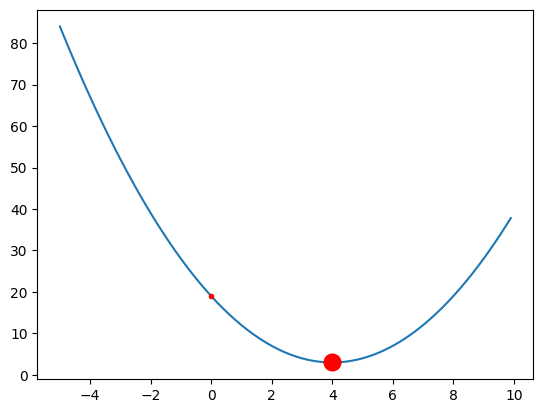

In [2]:
#Visualization of what SGD Optimizer does
def f(x):
    return x**2 - 8*x + 19
x = torch.arange(-5,10,.1)
y = f(x)
plt.plot(x,y)
x = torch.tensor(0.0, requires_grad = True)
optimizer = torch.optim.SGD([x], lr =.5)
for epoch in range(10):
    y = f(x)
    plt.plot(x.detach(), y.detach(), "ro", markersize = 3 + epoch)
    y.backward()
    optimizer.step()
    optimizer.zero_grad()
print(x)

In [3]:
#The minimum in this function, found with SGD, with a learning rate of 0.5
x.item()

4.0

In [4]:
#Loading the training data into a 
ds = torch.utils.data.TensorDataset(trainX, trainY)
dl = torch.utils.data.DataLoader(ds, batch_size=50, shuffle=True)
torch.manual_seed(544)
coef = torch.tensor([
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000], # POS_50_59_CP
        [0.0000], # POS_60_69_CP
        [0.0000],
        [0.0000],
        [0.0000]
], dtype=trainX.dtype, requires_grad = True)
loss = torch.nn.MSELoss()
optimizer = torch.optim.SGD([coef], lr =.000002)
for epoch in range(500):
    #first iterate over each batch
    for dX, dY in dl:
        #find prediction
        #calculate loss 
        predDX = dX @ coef
        dY = dY.reshape(-1,1)
        ret=loss(predDX, dY)
        ret.backward()
        optimizer.step()
        optimizer.zero_grad()
    #find prediction
    #calculate loss 
    #calculate gradient and optimize
train_pred = trainX @ coef
TotalLoss = loss(train_pred,trainY.reshape(-1,1))

In [5]:
#q9
TotalLoss.item()

26.811394014719298

In [6]:

test_pred = testX @ coef
TestTotalLoss = loss(test_pred,testY)
#coef is the predicted death rates using the SGD optimizer
coef

tensor([[-0.0351],
        [ 0.0007],
        [ 0.0013],
        [ 0.0131],
        [ 0.0116],
        [-0.0005],
        [ 0.0148],
        [-0.0122],
        [ 0.1636],
        [ 0.1458]], dtype=torch.float64, requires_grad=True)

In [7]:

TestTotalLoss.item()

29.05854692548551